# Prevendo valor de mercado de jogadores com Python


## Sobre mim

Olá! Sou um jovem rapaz da Bahia que trabalha com Desenvolvimento Web e agora decidi aprender um pouco sobre esse outro universo que é a Ciência de Dados.

Essas são minhas redes sociais:

* [LinkedIn](https://www.linkedin.com/in/lucasramosdev/)
* [GitHub](https://github.com/lucasramosdev)

## Sobre o projeto

A idéia é praticar os conceitos aprendidos no curso de [Introdução à Data Science com Python](https://www.youtube.com/watch?v=pjT_0nPiSqQ&list=PLFE-LjWAAP9SfEuLXf3qrpw4szKWjlYq9) do [Data - ICMC](http://data.icmc.usp.br/).

A base utilizada foi retirada do site [Kaggle](https://kaggle.com), do usuário [Debpritam Roy](https://www.kaggle.com/debpritamroy).

O resultado do algoritmo é dizer se o jogador vai valer ou não com base nos inputs.


#### Importações

Eu deixei as principais funções de pre-processamento em um arquivo chamado utils.py para não deixar tudo aglomerado nesse notebook. Então vamos importar ele!

In [124]:
import utils
import numpy as np
import matplotlib.pyplot as plt

In [125]:
# Essa é a nossa base de jogadores
players = utils.get_players()
players

,name,player_id
0,Aleksandr Hleb,597
1,Mike Hanke,1428
2,Youssef El Akchaoui,1560
3,Mario Eggimann,1587
4,Heiko Westermann,1726
...,...,...
28467,Rifat Erdem,199337
28468,Mücahit Atalay,209569
28469,Patrick Friday Eze,221118
28470,Burak Saban,273053


In [126]:
#Essa é a nossa base valores ao longo das temporadas
valuations = utils.get_valuations()
valuations

,player_id,date,market_value_in_eur
0,3132,2003-12-09,400000
1,6893,2003-12-15,900000
2,10,2004-10-04,7000000
3,26,2004-10-04,1500000
4,65,2004-10-04,8000000
...,...,...,...
424862,668268,2023-06-01,12000000
424863,696589,2023-06-01,5000000
424864,735571,2023-06-01,5000000
424865,811778,2023-06-01,7000000


In [127]:
#Essa base eu correlaciono as duas bases anteriores
stats = utils.get_stats()
stats

,player_id,date,market_value_in_eur,name
0,3132,2003-12-09,400000,Florin Cernat
1,6893,2003-12-15,900000,Gabriel Tamas
2,10,2004-10-04,7000000,Miroslav Klose
3,26,2004-10-04,1500000,Roman Weidenfeller
4,65,2004-10-04,8000000,Dimitar Berbatov
...,...,...,...,...
424862,668268,2023-06-01,12000000,Marquinhos
424863,696589,2023-06-01,5000000,Tim Iroegbunam
424864,735571,2023-06-01,5000000,Rodrigo Muniz
424865,811778,2023-06-01,7000000,Álvaro Fernandez


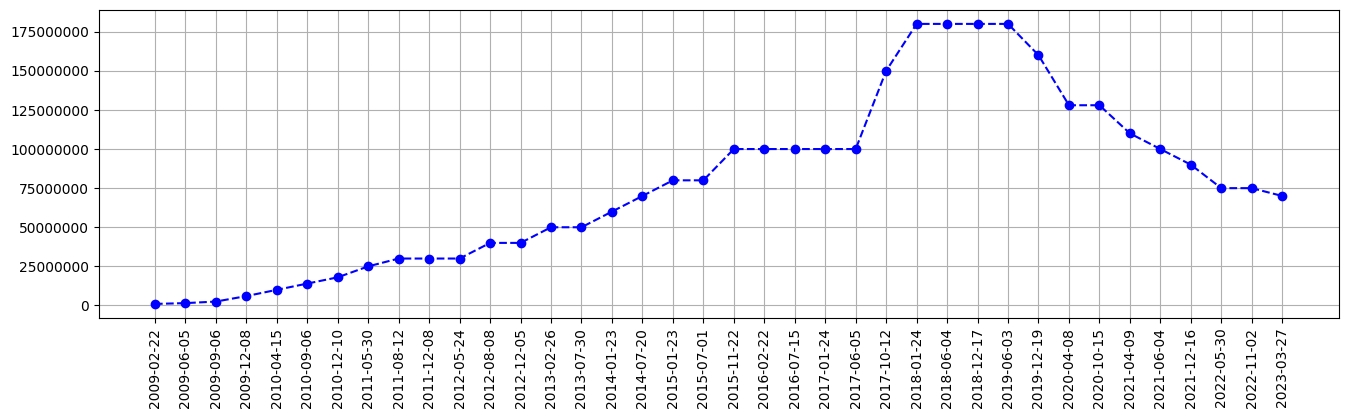

In [128]:
# Aqui a gente consegue ver o histórico do valor de mercado de um jogador
neymar = stats[stats.name == 'Neymar']
utils.show_player_history_value(neymar)

### Pré-processamento dos dados

#### Removendo coluna desnecessária

Minha ideia aqui é fazer uma correlação do jogador, da sua idade e do seu valor de mercado. Por esse motivo que vou remover apenas a coluna name. Eu quero testar se essa minha inteligência artifical consegue fazer a correlação através do id.

In [129]:
stats.drop(columns=['name'], inplace=True)

#### Normalizando as datas

O que eu penso em fazer aqui é converter as datas para timestamp, pois o campo last_season me da um inteiro enquanto os campos date e date_of_birth estão no padrão ISO-8601.

In [130]:
import pandas as pd
from datetime import datetime

stats['date'] = pd.to_datetime(stats['date']).astype('int64')
stats[stats.player_id == 68290]

,player_id,date,market_value_in_eur
24193,68290,1235260800000000000,1000000
26199,68290,1244160000000000000,1500000
30026,68290,1252195200000000000,2500000
32510,68290,1260230400000000000,6000000
37768,68290,1271289600000000000,10000000
43466,68290,1283731200000000000,14000000
46069,68290,1291939200000000000,18000000
52920,68290,1306713600000000000,25000000
59022,68290,1313107200000000000,30000000
61851,68290,1323302400000000000,30000000


#### Atribuindo se o valor é maior ou menor que 50 milhões

In [131]:
def is_more_than(x):
    if x > 50000000:
        return 1
    else:
        return 0

stats['is_more'] = stats['market_value_in_eur'].apply(is_more_than)
stats.drop(columns=['market_value_in_eur'], inplace=True)

#### Deixando os dados na mesma escala

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler = MinMaxScaler()
# scaler.fit(stats)
# stats = pd.DataFrame(scaler.transform(stats), columns=stats.columns)

### Treinando um modelo de aprendizado de máquina

#### Divisão de treino e validação

In [134]:
# Vamos colocar em variavel quais são nossas features e qual é o target
target = 'is_more'
features = list(stats.columns)
features.remove(target)

print('Features:', features)
print('Target:', target)

Features: ['player_id', 'date']
Target: is_more


In [135]:
from sklearn.model_selection import train_test_split

input_train, input_test, output_train, output_test = train_test_split(stats[features], stats[target], 
                                                    test_size=0.8, random_state=42)

scaler.fit(input_test)
input_train = pd.DataFrame(scaler.transform(input_train), columns=input_train.columns)
input_test = pd.DataFrame(scaler.transform(input_test), columns=input_test.columns)
print(input_train.shape)
print(input_test.shape)
print(output_train.shape)
print(output_test.shape)

(84973, 2)
(339894, 2)
(84973,)
(339894,)


#### Criando e treinando um modelo

In [136]:
# Importando nosso classificador
from sklearn.neighbors import KNeighborsClassifier

# Criando o modelo que usa somento um vizinho
clf = KNeighborsClassifier(n_neighbors=1)
# Treinando o modelo nos dados de treino
clf.fit(input_train, output_train)

KNeighborsClassifier(n_neighbors=1)

In [137]:
# Assim podemos usar o modelo para prever a classe de novos exemplos
output_pred = clf.predict(input_test)
output_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
# Importar a função que calcula a acurácia
from sklearn.metrics import accuracy_score

acc = accuracy_score(output_test, output_pred)
print('Acurácia:', acc)

Acurácia: 0.9940275497655151


In [139]:
# # Criando lista com todos os números de vizinhos que queremos testar
# n_vizinhos = np.arange(1, 11) # Array de 1 a 10

# # Criando uma lista para guardarmos os resultados
# resultados = []

# # Para cada numero de vizinhos
# for k in n_vizinhos:
#     # Criamos um modelo novo e treinamos ele
#     clf = KNeighborsClassifier(n_neighbors=k)
#     clf.fit(input_train, output_train)
    
#     # Fazendo predição para os dados de validação e calculando acurácia
#     output_pred = clf.predict(input_test)
#     acc = accuracy_score(output_test, output_pred)
    
#     # Salvando a acurácia para o numero atual de vizinhos
#     resultados.append(acc)

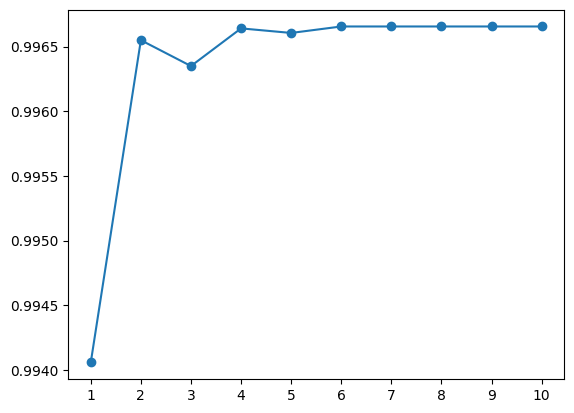

In [140]:
# No eixo x teremos o número de vizinhos e no eixo y a acurácia
plt.plot(n_vizinhos, resultados, '-o')
# Definindo que no eixo x queremos exibir cada numero de vizinhos
plt.xticks(n_vizinhos);

In [141]:
# Agora iremos salvar o modelo para utilizar em outro notebook
import pickle

# Recriado o modelo com o melhor vizinho
clf = KNeighborsClassifier(n_neighbors=4)
# Treinando o modelo nos dados de treino
clf.fit(input_train, output_train)

#exportando o modelo
with open('previsao_valor_jogadores.pkl', 'wb') as file:
    pickle.dump(clf, file)

#exportando o scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)